THIS IS ONLY FOR THE PAIRPLOT LOL

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pwd

'/Users/ER/Desktop/GA:ADA/Course_Materials/project2/project-2'

In [52]:
df = pd.read_csv('./datasets/train.csv')
pd.set_option('display.max_columns', None)
df

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
0      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
1      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
2      NaN       Reg          Lvl    AllPub     Inside        Gtl   
3      NaN       Reg          Lvl    AllPub     Inside        Gtl   
4      NaN       IR1          Lvl    AllPub     Inside        Gtl   
...    ...       ...          ...       ...        ...        ...   
2046   NaN       IR1          HLS    AllPub     Inside        Gtl   
2047   NaN       IR1          Lvl    AllPub     Inside        Gtl   
2048   NaN       Reg          Bnk    AllPub     Inside        Gtl   
2049   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2050   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0          Sawyer        RRAe        Norm      1Fam      2Story             6   
1         SawyerW        Norm        Norm      1Fam      2Story             7   
2           NAmes        Norm        Norm      1Fam      1Story             5   
3          Timber        Norm        Norm      1Fam      2Story             5   
4         SawyerW        Norm        Norm      1Fam      1.5Fin             6   
...           ...         ...         ...       ...         ...           ...   
2046       Timber        Norm        Norm      1Fam      1Story             8   
2047      Edwards        Norm        Norm      1Fam      1Story             4   
2048      Crawfor        Norm        Norm      1Fam      1.5Fin             6   
2049        NAmes        Norm        Norm      1Fam      1Story             4   
2050      Gilbert        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2046             5        2007            2007      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   
2048             6        1928            1950      Gable   CompShg   
2049             5        1956            1956      Gable   CompShg   
2050             5        1999            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None 

At first glance and from what I know about homes and home buying, I'm seeing a ton of really great features that could potentially be great predictors as well. Let's dig in.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [54]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [55]:
df.head(3)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   

   kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
0              1           Gd              6        Typ           0   
1              1           Gd              8        Typ           1   
2              1           Gd              5        Typ           0   

  fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
0          NaN      Attchd         1976.0           RFn          2.0   
1           TA      Attchd         1997.0           RFn          2.0   
2          NaN      Detchd         1953.0           Unf          1.0   

   garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
0        475.0          TA          TA           Y             0   
1        559.0          TA          TA           Y             0   
2        246.0          TA          TA           Y             0   

   open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc  \
0             44               0           0             0          0     NaN   
1             74               0           0             0          0     NaN   
2             52               0           0             0          0     NaN   

  fence misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  
0   NaN          Na

In [56]:
df.isnull().sum().loc[lambda x: x>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

I'm seeing a ton of missing values. I'm going to get rid of the rows that only have 1-2 missing in the specified columns above and then deal with the rest later.

In [45]:
df.dropna(subset=['bsmtfin_sf_1',
                  'bsmtfin_sf_2',
                  'bsmt_unf_sf',
                  'total_bsmt_sf',
                  'bsmt_full_bath',
                  'bsmt_half_bath',
                  'garage_cars',
                  'garage_area'], inplace=True)
# I tried to use threshold instead but it wouldn't work properly for what I wanted it to do
# So I copied and pasted the column names for ease 

In [46]:
df.isnull().sum().loc[lambda x: x>0]
# Ensuring it stuck

lot_frontage       330
alley             1908
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           53
bsmt_cond           53
bsmt_exposure       56
bsmtfin_type_1      53
bsmtfin_type_2      54
fireplace_qu       998
garage_type        113
garage_yr_blt      113
garage_finish      113
garage_qual        113
garage_cond        113
pool_qc           2039
fence             1650
misc_feature      1983
dtype: int64

In [76]:
df[['bsmtfin_sf_1',
    'bsmtfin_sf_2',
    'bsmt_unf_sf',
    'total_bsmt_sf',
    'bsmt_full_bath',
    'bsmt_half_bath',
    'garage_cars',
    'garage_area']].astype(float).head(3)
# Converting them to floats after checking their dtype in the dead display above

bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  bsmt_full_bath  \
0         533.0           0.0        192.0          725.0             0.0   
1         637.0           0.0        276.0          913.0             1.0   
2         731.0           0.0        326.0         1057.0             1.0   

   bsmt_half_bath  garage_cars  garage_area  
0             0.0          2.0        475.0  
1             0.0          2.0        559.0  
2             0.0          1.0        246.0

In [75]:
df.dtypes[['bsmtfin_sf_1',
           'bsmtfin_sf_2',
           'bsmt_unf_sf',
           'total_bsmt_sf',
           'bsmt_full_bath',
           'bsmt_half_bath',
           'garage_cars',
           'garage_area']]

# Ensuring it stuck

bsmtfin_sf_1      float64
bsmtfin_sf_2      float64
bsmt_unf_sf       float64
total_bsmt_sf     float64
bsmt_full_bath    float64
bsmt_half_bath    float64
garage_cars       float64
garage_area       float64
dtype: object

Alright! Now that we've done that short fix - I'm going to do some initial visualizations and deeper cleans.

In [77]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

I will go ahead and remove the 'id' and 'pid' columns as they are irrelevant to our analysis and only coincide to sale code information, per the data description.

In [78]:
df.drop(columns=['id', 'pid'], inplace=True)

In [79]:
df.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

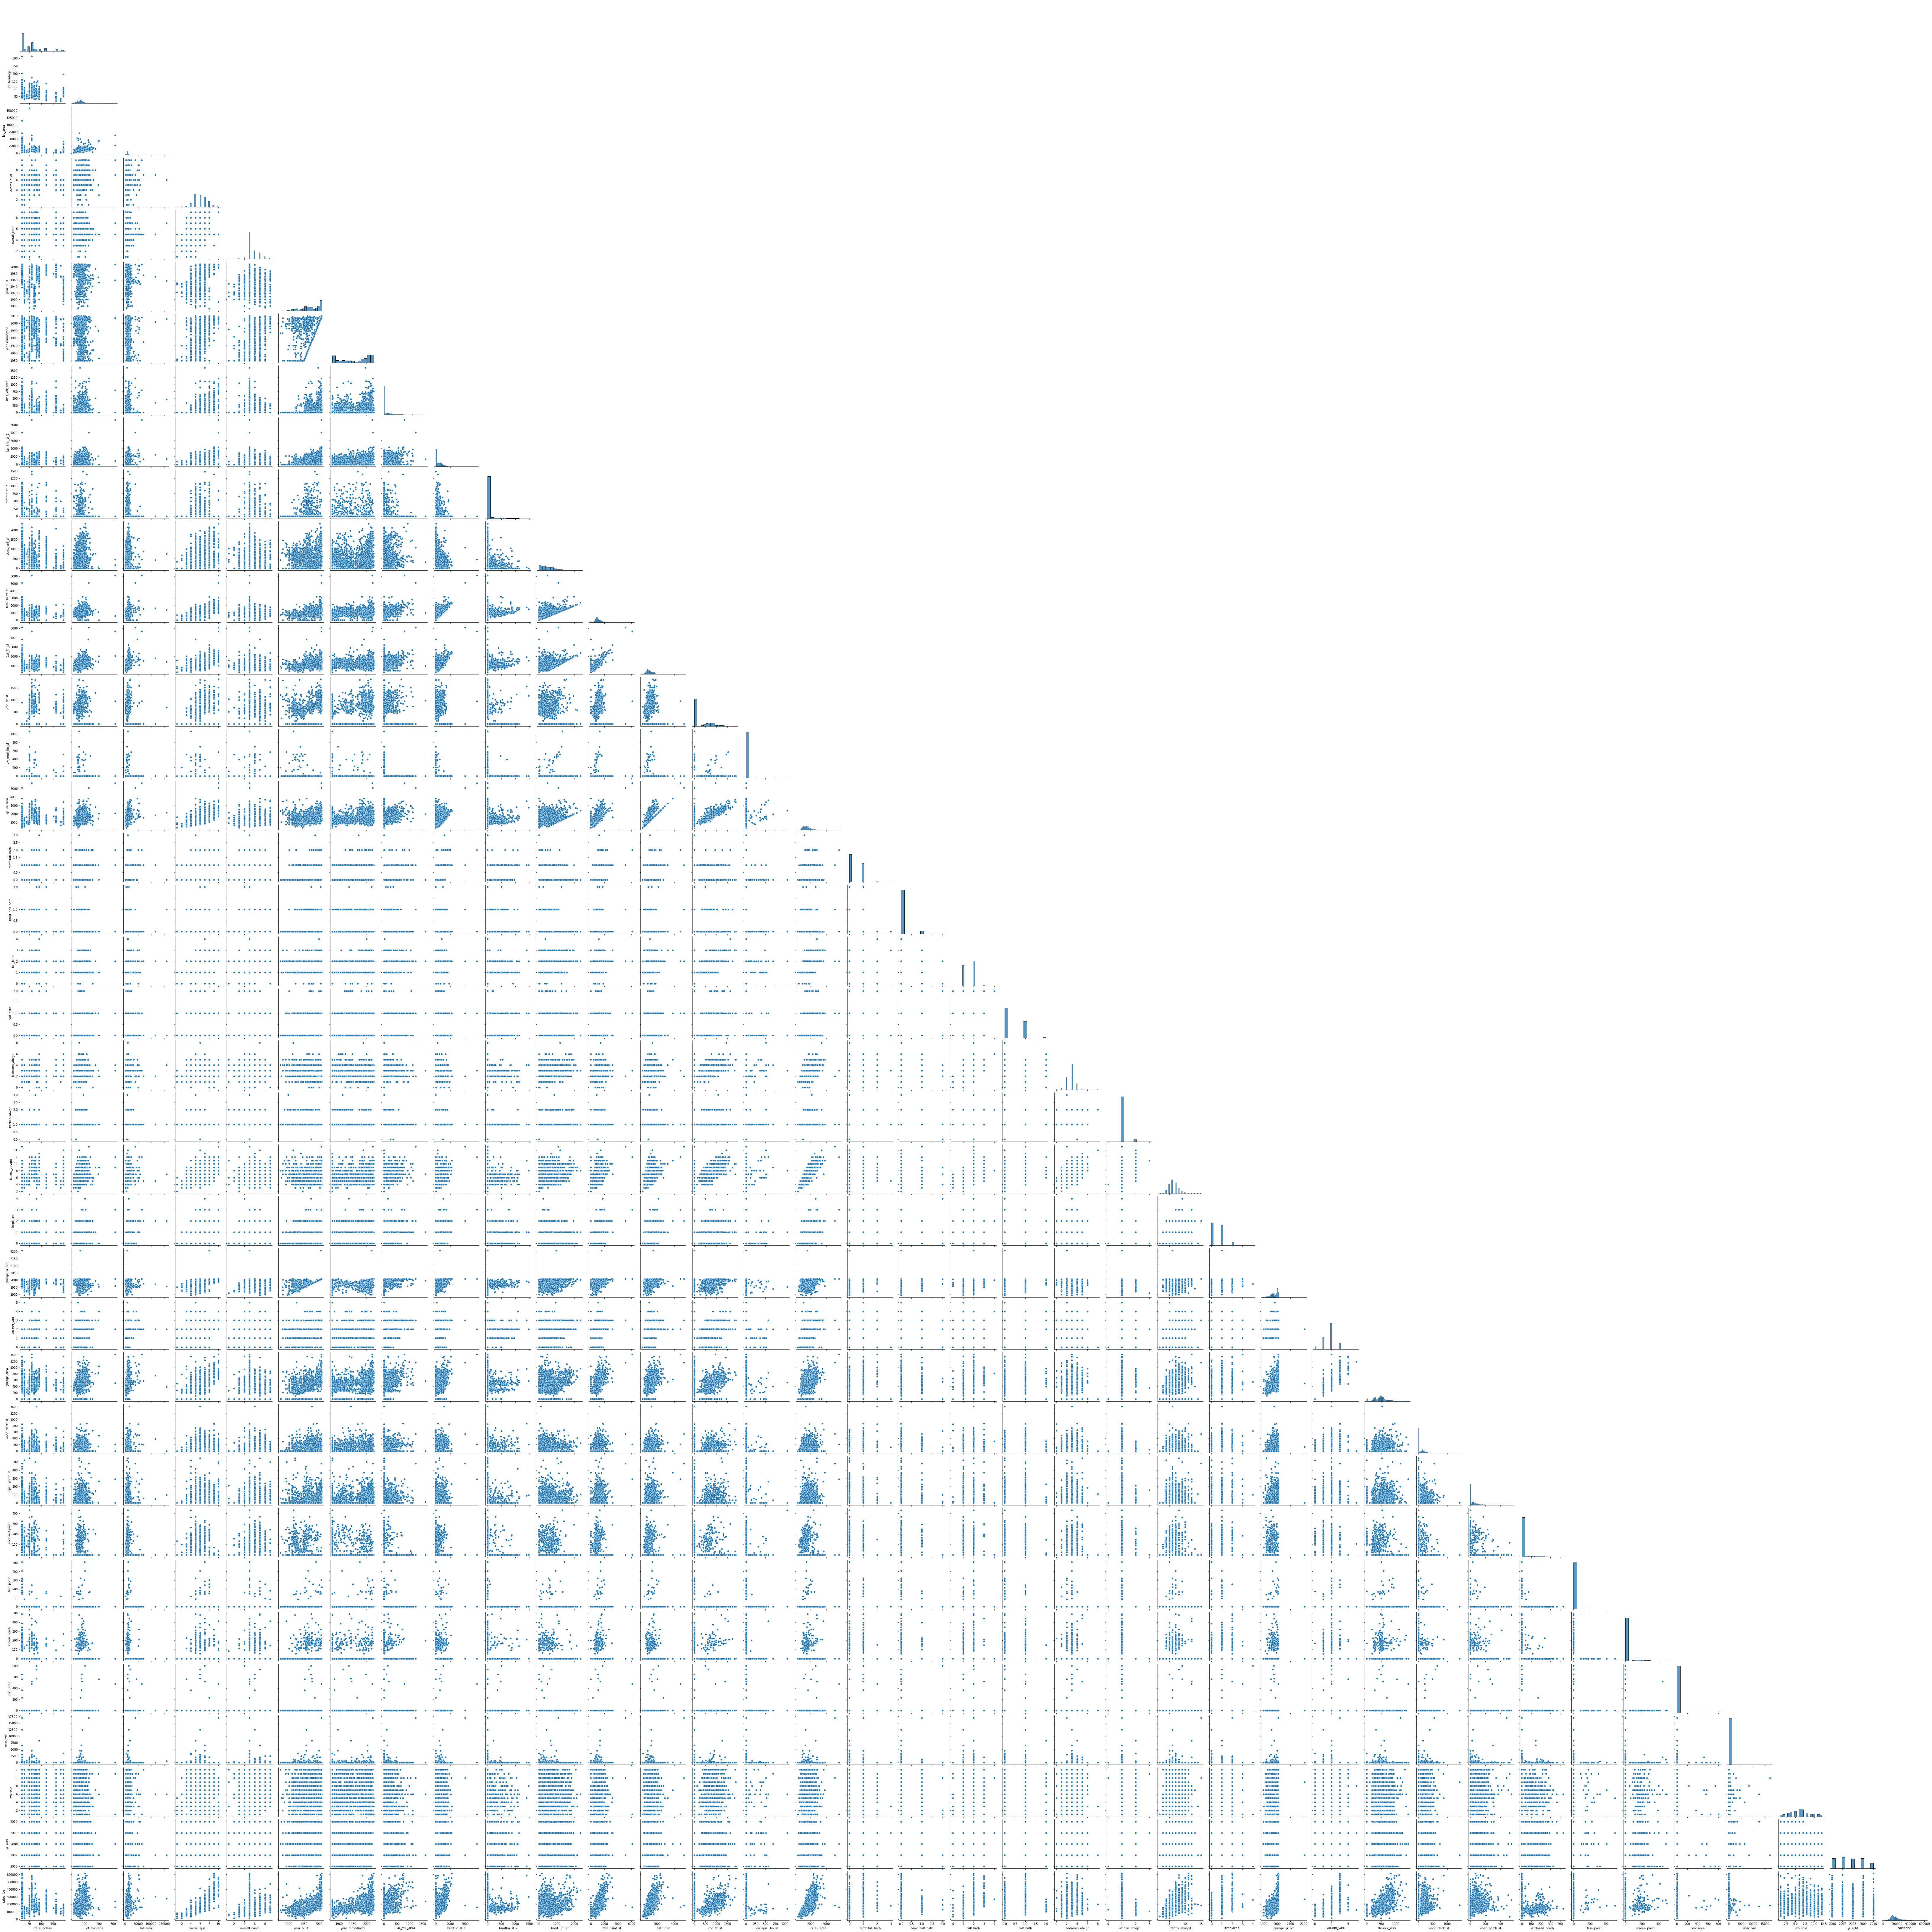

In [80]:
sns.pairplot(df, corner=True)

In [ ]:
year built, year remodeled, mas vnr area, bsmt sq ft total, first floor sq ft, 2nd floor sq ft, garage area, screen porch, enclosed porch, totrms abv grd